# Anomaly Based Network Intrution Detection Module based on Short Support Vector Machine Algorithm

An anomaly NID (Network Intrusion Detection) module is an artificial intelligence system designed to detect and flag anomalous network traffic behavior. In this particular project, SVG (Scalable Vector Graphics) will be used as a tool to visualize the network traffic data and provide a more intuitive and user-friendly interface for analyzing the results.

The dataset used in this project is CSE-CIC-IDS 2018 (02-20-2018), which is a publicly available dataset for network intrusion detection research. This dataset includes a large volume of network traffic data captured from a realistic environment, along with labeled examples of normal and anomalous traffic behavior.

By leveraging the power of SVG and AI, this project aims to provide an effective and efficient tool for identifying network anomalies and securing critical network infrastructures against potential attacks.

# Import necessary modules

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#if the package are not installed run following command
#pip install pandas numpy matplotlib seaborn scikit-learn

# Import dataset 

The CSE-CIC-IDS 2018 dataset is a collection of over 2.8 million network traffic records created by the Canadian Institute for Cybersecurity. It contains both normal and malicious traffic, including ten different types of network attacks. This dataset is used to train and test intrusion detection systems and machine learning models to detect network attacks.


To download the CSE-CIC-IDS 2018 dataset use this link: https://www.kaggle.com/datasets/solarmainframe/ids-intrusion-csv

I am using the 02-20-2018.csv file for this project as data_4.csv.

In [2]:
df = pd.read_csv("data_4.csv") #CSE-CIC-IDS 2018 (02-20-2018)
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,172.31.69.7-185.2.197.19-623-42801-6,185.2.197.19,42801,172.31.69.7,623,6,20/02/2018 01:41:45,94042,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948744,172.31.69.7-195.22.125.42-22-2178-6,195.22.125.42,2178,172.31.69.7,22,6,20/02/2018 11:51:06,251281,4,2,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948745,172.31.69.7-107.3.188.61-23-14259-6,107.3.188.61,14259,172.31.69.7,23,6,20/02/2018 08:49:20,21,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
7948746,172.31.69.7-5.188.11.188-3039-54193-6,5.188.11.188,54193,172.31.69.7,3039,6,20/02/2018 02:00:54,181954,2,1,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign


In [3]:
print(df.head())

                                  Flow ID          Src IP  Src Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172     45498   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   

         Dst IP  Dst Port  Protocol            Timestamp  Flow Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot Fwd Pkts  Tot Bwd Pkts  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0            11            11  ...       

# Data Cleaning

## Replace space with "_"
In order to avoid future conflicts, we need to replace spaces with underscores.

In [3]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

                                  Flow_ID          Src_IP  Src_Port  \
0  172.31.69.25-94.231.103.172-22-45498-6  94.231.103.172     45498   
1                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
2                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
3                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   
4                   8.0.6.4-8.6.0.1-0-0-0         8.6.0.1         0   

         Dst_IP  Dst_Port  Protocol            Timestamp  Flow_Duration  \
0  172.31.69.25        22         6  20/02/2018 08:34:07         888751   
1       8.0.6.4         0         0  20/02/2018 08:33:22      112642816   
2       8.0.6.4         0         0  20/02/2018 08:36:11      112642712   
3       8.0.6.4         0         0  20/02/2018 08:39:00      112642648   
4       8.0.6.4         0         0  20/02/2018 08:41:49      112642702   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0            11            11  ...       

## Filter HTTP and HTTPS traffic
As I want to narrow down the data, I need to filter out the HTTP and HTTPS traffic. Through this filter I capable of train the SVM model to identify DDos attacks.

In [4]:
query = df.query('Dst_Port == 80 or Dst_Port == 443')
df=query
print('Number of rows:', df.shape[0])

Number of rows: 2665877


## Checking for null and INFINITE

In [5]:
# check for null
df.isnull().any()

Flow_ID      False
Src_IP       False
Src_Port     False
Dst_IP       False
Dst_Port     False
             ...  
Idle_Mean    False
Idle_Std     False
Idle_Max     False
Idle_Min     False
Label        False
Length: 84, dtype: bool

In [6]:
# counting infinity in a particular column name
inf=df.isin([np.inf, -np.inf])
inf

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948537,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7948700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
##df = df[np.isfinite(df).all(1)]
#drop null
df.dropna(how = 'all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,172.31.69.25-60.191.38.77-80-42946-6,60.191.38.77,42946,172.31.69.25,80,6,20/02/2018 09:29:47,5222759,4,4,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
58,131.202.242.193-172.31.69.25-8837-80-6,131.202.242.193,8837,172.31.69.25,80,6,20/02/2018 10:11:19,5056542,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
59,131.202.242.193-172.31.69.25-8837-80-6,131.202.242.193,8837,172.31.69.25,80,6,20/02/2018 10:11:24,197,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
60,131.202.242.193-172.31.69.25-8836-80-6,131.202.242.193,8836,172.31.69.25,80,6,20/02/2018 10:11:18,5940703,7,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
61,131.202.242.193-172.31.69.25-8836-80-6,131.202.242.193,8836,172.31.69.25,80,6,20/02/2018 10:11:24,54,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,172.31.69.7-216.218.206.97-80-46940-6,216.218.206.97,46940,172.31.69.7,80,6,20/02/2018 11:19:48,18,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948537,172.31.69.7-184.105.247.199-80-34367-6,184.105.247.199,34367,172.31.69.7,80,6,20/02/2018 11:49:05,22,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948660,141.212.122.161-172.31.69.7-56517-443-6,141.212.122.161,56517,172.31.69.7,443,6,20/02/2018 08:40:33,3,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948700,172.31.69.7-71.6.202.198-80-50000-6,71.6.202.198,50000,172.31.69.7,80,6,20/02/2018 11:10:49,20,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Checking Data type

In [8]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665877 entries, 37 to 7948728
Data columns (total 82 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow_ID            object 
 1   Src_IP             object 
 2   Src_Port           int64  
 3   Dst_IP             object 
 4   Dst_Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow_Duration      int64  
 8   Tot_Fwd_Pkts       int64  
 9   Tot_Bwd_Pkts       int64  
 10  TotLen_Fwd_Pkts    float64
 11  TotLen_Bwd_Pkts    float64
 12  Fwd_Pkt_Len_Max    float64
 13  Fwd_Pkt_Len_Min    float64
 14  Fwd_Pkt_Len_Mean   float64
 15  Fwd_Pkt_Len_Std    float64
 16  Bwd_Pkt_Len_Max    float64
 17  Bwd_Pkt_Len_Min    float64
 18  Bwd_Pkt_Len_Mean   float64
 19  Bwd_Pkt_Len_Std    float64
 20  Flow_IAT_Mean      float64
 21  Flow_IAT_Std       float64
 22  Flow_IAT_Max       float64
 23  Flow_IAT_Min       float64
 24  Fwd_IAT_T

## Drop all column contain object datatype exept Label
Drop Timestamp, Flow_id, Src_ip and Dst_ip columns as they contain object datatype and will not be usefull in traning model. 

In [5]:
df = df.drop(columns=['Timestamp', 'Flow_ID', 'Src_IP', 'Dst_IP'])
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
37,42946,80,6,5222759,4,4,289.0,972.0,289.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
58,8837,80,6,5056542,4,4,281.0,509.0,281.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
59,8837,80,6,197,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
60,8836,80,6,5940703,7,6,907.0,1597.0,323.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
61,8836,80,6,54,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948488,46940,80,6,18,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948537,34367,80,6,22,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948660,56517,443,6,3,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7948700,50000,80,6,20,1,1,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## Modify Label column
Label column consists of the main values which defines waether the data in the raw discribe attach or not. In order to convert from object to numaric, first look in to data exists in the column.

In [6]:
daummy = pd.get_dummies(df['Label'])
daummy.head()
print(df['Label'].value_counts())

Benign                    2089686
DDoS attacks-LOIC-HTTP     576191
Name: Label, dtype: int64


As we can see there are only two values present. Now we can use binary method to catogaries the data as below.
<br>benign --> 0
<br>DDoS attacks --> 1

In [7]:
df.Label[df.Label=='Benign'] = 0
df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1
print(df['Label'].value_counts())

0    2089686
1     576191
Name: Label, dtype: int64


C:\Users\sahan\AppData\Local\Temp\ipykernel_26804\3583033837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label=='Benign'] = 0
C:\Users\sahan\AppData\Local\Temp\ipykernel_26804\3583033837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Label[df.Label =='DDoS attacks-LOIC-HTTP'] = 1


## Reduce Bening rows
Through reducing the number of bening rows, we can increse the percentage of traning and testing data in both data versions.

In [8]:
# Count the number of rows in each class
ddos_count = df[df['Label'] == 1].shape[0]
benign_count = df[df['Label'] == 0].shape[0]

# Randomly sample the benign rows to reduce their count
df_benign = df[df['Label'] == 0].sample(n=ddos_count, random_state=42)

# Combine the DDoS and sampled benign rows into a new dataframe
df_reduced = pd.concat([df[df['Label'] == 1], df_benign])

# Shuffle the rows in the new dataframe
df_reduced = df_reduced.sample(frac=1, random_state=42)

df = df_reduced

print(df['Label'].value_counts())

0    576191
1    576191
Name: Label, dtype: int64


# Date Analysis

The code is creating a scatter plot with 'Flow_Duration' on the x-axis and 'Tot_Fwd_Pkts' on the y-axis. It is comparing the distribution of these two variables between the 'benign' and 'malignant' classes.

The scatter plot shows that most of the 'malignant' flows have a 'Tot_Fwd_Pkts' value between 0 to 250000 and 'Flow_Duration' between 0 to 1.2 seconds. On the other hand, most of the 'benign' flows have a much smaller 'Tot_Fwd_Pkts' value, less than 1000, within the same time period. This indicates that there is a clear difference between the 'malignant' and 'benign' classes in terms of the number of forwarded packets during the flow duration.

A Support Vector Machine (SVM) model trained on this dataset could be used for binary classification to classify a network traffic flow as either benign or malicious based on the available features. Given the scatter plot, we can see that there is a clear separation between the benign and malicious flows, which could potentially lead to good classification performance by an SVM model. However, it's important to note that this dataset may not represent all possible network traffic scenarios, and there may be additional data preprocessing and feature engineering steps required to achieve optimal performance from the SVM model.

In [9]:
bening_df = df[df['Label']==0]
malignant_df = df[df['Label']==1]

<Axes: xlabel='Flow_Duration', ylabel='Tot_Fwd_Pkts'>

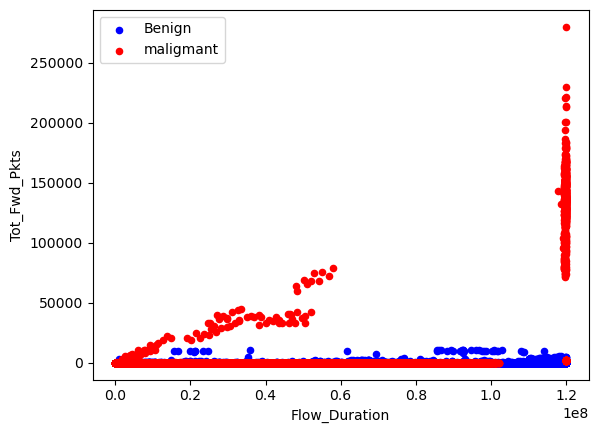

In [11]:
axes = bening_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Flow_Duration', y = 'Tot_Fwd_Pkts', color='red', label='maligmant', ax=axes)

# Creating Traning and Testing arrays

This step is creating a numpy array of the selected independent variables from the training dataset, which will be used to train the SVM model. The purpose of creating a numpy array is to ensure that the data is in a format that can be efficiently processed by the machine learning algorithm. The numpy array created here will have 15,000 rows (since we selected 15,000 rows from the original dataset) and 79 columns (since we selected 79 columns from the original dataset as features).

## Creating train_df dataset

In [10]:
# Shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Select a subset of the data for training
num_data = 150000 # can change between 500 and 1152382
train_df = df.iloc[:num_data].copy() # Use .iloc to avoid a SettingWithCopyWarning
train_df = train_df.astype("float64")

print('Data type of each column of Dataframe :')
train_df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           150000 non-null  float64
 1   Dst_Port           150000 non-null  float64
 2   Protocol           150000 non-null  float64
 3   Flow_Duration      150000 non-null  float64
 4   Tot_Fwd_Pkts       150000 non-null  float64
 5   Tot_Bwd_Pkts       150000 non-null  float64
 6   TotLen_Fwd_Pkts    150000 non-null  float64
 7   TotLen_Bwd_Pkts    150000 non-null  float64
 8   Fwd_Pkt_Len_Max    150000 non-null  float64
 9   Fwd_Pkt_Len_Min    150000 non-null  float64
 10  Fwd_Pkt_Len_Mean   150000 non-null  float64
 11  Fwd_Pkt_Len_Std    150000 non-null  float64
 12  Bwd_Pkt_Len_Max    150000 non-null  float64
 13  Bwd_Pkt_Len_Min    150000 non-null  float64
 14  Bwd_Pkt_Len_Mean   150000 non-null  float64
 15  Bwd_Pkt_Len

In [47]:
df.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       

## Extract Label column to seperate array

In [11]:
# Remove Label column from train_df and store it in target variable as nparray
target = np.asanyarray(train_df.pop('Label'))


# create train_df nparray varibel
raw = np.asanyarray(train_df)
      
print("is raw isinf: \n",np.isinf(raw),"\n")
print("is raw isfinite: \n",np.isfinite(raw),"\n")
print("is raw nan: \n", np.isnan(raw),"\n\n")


is raw isinf: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 

is raw isfinite: 
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 

is raw nan: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 




In [12]:
# replace infinite values with a large finite value
raw[~np.isfinite(raw)] = np.finfo(raw.dtype).max

# replace NaN values with zero
raw = np.nan_to_num(raw)

raw = np.asanyarray(train_df)
print("is raw isinf: \n",np.isinf(raw),"\n")
print("is raw isfinite: \n",np.isfinite(raw),"\n")
print("is raw nan: \n", np.isnan(raw),"\n\n")

print("target array: \n", target,"\n\n","raw array: \n", raw)

is raw isinf: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 

is raw isfinite: 
 [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]] 

is raw nan: 
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 


target array: 
 [0. 0. 0. ... 0. 1. 0.] 

 raw array: 
 [[5.348300e+04 4.430000e+02 6.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [5.23570

# Data Devision

In [13]:
from sklearn.model_selection import train_test_split

test_size = 0.2 # number of training raws
random_state = 42 # random seed

X_train, X_test, y_train, y_test = train_test_split(raw, target, test_size=test_size, random_state=random_state)



# SVM Model

In [16]:
from sklearn.preprocessing import StandardScaler


# transform the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Identify best mathching kernel, C and gamma

In [14]:
##Importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn import svm


##Defining hyperparameter values for SVM model
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}


svm_model = svm.SVC()                                   ## Creating an SVM object
grid_search = GridSearchCV(svm_model, param_grid, cv=5) ## Creating a GridSearchCV object
grid_search.fit(X_train, y_train)                       ## Fitting the GridSearchCV object on training data

print("Best kernel:", grid_search.best_params_['kernel'])
print("Best C:", grid_search.best_params_['C'])
print("Best gamma:", grid_search.best_params_['gamma'])

e:\Anaconda\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


In [26]:
##use grid function to find best matching parameters
#from sklearn.model_selection import GridSearchCV 
#param= {'kernel':('linear','poly','rbf','sigmoid'),
#        'C':[2,3,1],
#        'degree':[3,100],
#        'coef0':[0.001,1000,0.5],
#        'gamma': ('auto', 'scale')
#       }
#SVModel=svm.SVC()
#GridS = GridSearchCV(SVModel, param, cv=5)
#GridS.fit(raw_test, label_test)
#GridS.best_params_

In [27]:
##implemet and optimize wtih grid serch 
#model=svm.SVC(kernel="linear", C=2, coef0=0.001, degree =3, gamma='auto')
#model.fit(raw_train,label_train)
#acc = model.score(raw_test, label_test)
#print("Anomaly based IDs Accuracy with SVM: {:.2f}%".format(acc * 100))

In [28]:
#plot_confusion_matrix(estimator, X, y_true) 
from sklearn.metrics import plot_confusion_matrix   
plot_confusion_matrix(model, raw_test, label_test) 

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (e:\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
## Generate classification report 
from sklearn.metrics import classification_report
svm_prediction = model.predict(raw_test)
print( '\nClasification report:\n', classification_report(label_test, svm_prediction))


Clasification report:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2378
         1.0       0.99      0.45      0.61       622

    accuracy                           0.88      3000
   macro avg       0.93      0.72      0.77      3000
weighted avg       0.90      0.88      0.87      3000



# Long Short Term Memory (LSTM)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [ ]:
# reshape input to be [samples, time steps, features]
raw_train = np.reshape(raw_train, (raw_train.shape[0], 1, raw_train.shape[1]))
raw_test = np.reshape(raw_test, (raw_test.shape[0], 1,raw_test.shape[1]))


In [ ]:
raw_train.shape

(12000, 1, 77)

In [ ]:
# not working execute with error 
####look_back = 1
###model = Sequential()
###model.add(LSTM(4, input_shape=(1, look_back)))
###model.add(Dense(1))
###model.compile(loss='mean_squared_error', optimizer='adam')
##model.fit(raw_train, label_train, epochs=100, batch_size=1, verbose=2)
####model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
#####model.fit(df, target, nb_epoch=10000, batch_size=1, verbose=2,validation_data=(x_test, y_test))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
history= regressor.fit(raw_train, label_train, epochs=15, batch_size=1, verbose=2,validation_data=(raw_test, label_test))
history 

Epoch 1/15
12000/12000 - 12s - loss: 0.1224 - accuracy: 0.9253 - val_loss: 0.0702 - val_accuracy: 0.9780
Epoch 2/15
12000/12000 - 11s - loss: 0.0868 - accuracy: 0.9646 - val_loss: 0.0530 - val_accuracy: 0.9850
Epoch 3/15
12000/12000 - 11s - loss: 0.0703 - accuracy: 0.9765 - val_loss: 0.0423 - val_accuracy: 0.9897
Epoch 4/15
12000/12000 - 11s - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0441 - val_accuracy: 0.9893
Epoch 5/15
12000/12000 - 11s - loss: 0.0525 - accuracy: 0.9808 - val_loss: 0.0234 - val_accuracy: 0.9897
Epoch 6/15
12000/12000 - 11s - loss: 0.0506 - accuracy: 0.9804 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 7/15
12000/12000 - 11s - loss: 0.0493 - accuracy: 0.9812 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 8/15
12000/12000 - 11s - loss: 0.0468 - accuracy: 0.9817 - val_loss: 0.0258 - val_accuracy: 0.9910
Epoch 9/15
12000/12000 - 11s - loss: 0.0440 - accuracy: 0.9839 - val_loss: 0.0237 - val_accuracy: 0.9910
Epoch 10/15
12000/12000 - 11s - loss: 0.0444 - accuracy

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 1, 50)                25600     
_________________________________________________________________
dropout (Dropout)            (1, 1, 50)                0         
_________________________________________________________________
lstm_1 (LSTM)                (1, 50)                   20200     
_________________________________________________________________
dropout_1 (Dropout)          (1, 50)                   0         
_________________________________________________________________
dense (Dense)                (1, 1)                    51        
Total params: 45,851
Trainable params: 45,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#results = regressor.predict(raw_test)
#results

array([[4.1138429e-02],
       [8.8503981e-01],
       [1.0651705e+00],
       ...,
       [1.0806975e-03],
       [1.7086133e-04],
       [2.0779710e-04]], dtype=float32)

In [ ]:
#results=np.arange(0,len(results),1)
#results.shape

(3000,)

In [ ]:
#label_test.shape

(3000,)

In [ ]:
#plt.scatter(range(20),results[:,0],c='r')
#plt.scatter(range(20),label_test[:,0],c='r')
#plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

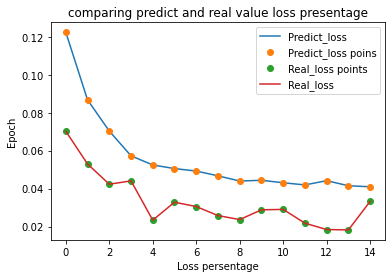

In [ ]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['loss'], 'o')
plt.plot(history.history['val_loss'], 'o')
plt.plot(history.history['val_loss'])
plt.title('comparing predict and real value loss presentage')
plt.xlabel('Loss persentage')
plt.ylabel('Epoch')
plt.legend(['Predict_loss','Predict_loss poins','Real_loss points', 'Real_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

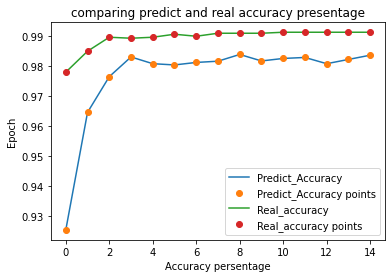

In [ ]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('comparing predict and real accuracy presentage')
plt.xlabel('Accuracy persentage')
plt.ylabel('Epoch')
plt.legend(['Predict_Accuracy','Predict_Accuracy points', 'Real_accuracy','Real_accuracy points'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

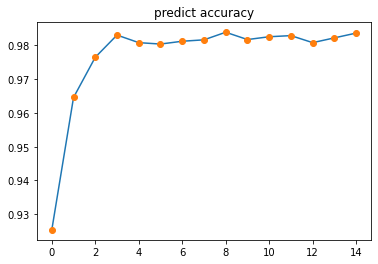

In [ ]:
#accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'],'o')
plt.title('predict accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

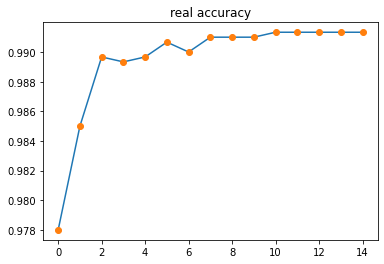

In [ ]:
#val_accuracy Plot
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_accuracy'],'o')
plt.title('real accuracy')
plt.show

# Other usefull pieces of code:

## to scale down the value of X_testing and X_train

In [ ]:
from sklearn.preprocessing import StandardScaler


# transform the training and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)